In [30]:
# import all necessary libraries
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_pickle('class_data.pkl')  ### read data into dataframe

In [3]:
df

,title,categories,description,fiction
0,Optical Studies in Liquids and Solids,"Science, Technology & Medicine",The study of the vibrations of polyatomic mole...,False
1,Economics with Connect Plus Card,"Business, Finance & Law",The combination of David Begg with new co-auth...,False
2,"Scoring High on SAT, Teacher Edition Grade 6","Politics, Society & Education",Teacher Edition,False
3,Teaching Anticorruption,"Business, Finance & Law",The movement in management education towards a...,False
4,Learning Organizations,"Business, Finance & Law",Learning Organizations: Turning Knowledge into...,False
...,...,...,...,...
45121,Whio,"Science, Technology & Medicine","The blue duck, or whio, is one of New Zealand'...",False
45122,Northern Irish Poetry,"Poetry, Drama & Criticism",Through discussion of the ways in which major ...,True
45123,"Reviews of Physiology, Biochemistry and Pharma...","Science, Technology & Medicine",W. Ulbricht: Effects of veratridine on sodium ...,False
45124,The Vital Needs Of The Dead By Igor Sakhnovsky,Fiction,The Vital Needs of the Dead is a tender coming...,True


In [4]:
def clean_text(text):   ### create a function to clean the text from description
    text = re.sub("\''", "", text) ## this escapes the single quatos
    text = re.sub("[^a-zA-Z]", " ", text) ### find all the alphabet letter, both uppercase and lowercase
    text = ' '.join(text.split())  ### join single word togather as a string
    text = text.lower()  ### take the lowercase of all words
    return text

In [5]:
df['clean_des'] = df['description'].apply(lambda x: clean_text(x))   ### clean the description

In [6]:
def fre_words(x, terms):   #### Check 
    all_words = ' '.join([text for text in x])
    print(all_words)
    all_words = all_words.split()
    print(all_words)
    fdist = nltk.FreqDist(all_words)
    words_df =pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns='count', n = terms)
    plt.figure(figsize=(20, 20))
    ax = sns.barplot(data=d, x='count', y='word')
    ax.set(ylabel = 'word')
    plt.show()

In [47]:
tf = TfidfVectorizer(max_df=0.1, stop_words=ENGLISH_STOP_WORDS)
#TfidVectorizer function from sklearn library is used to extract features from abstract and assigning weights to the feature values.  max_df used for removing terms that appear too frequently

the study of the vibrations of polyatomic molecules has recently turned into one of the most widespread and powerful methods of studying molecular structure these vibrations ap pear directly in the infrared absorption spectra and raman spectra of gases liquids and solids a measurement of the number of bands in addition to their positions frequencies or wavelengths offers the possibility of obtaining a great deal of important information regarding the geometric and mechanical properties of the molecules the types of chemical bonds and so forth it is now quite difficult to list the vast number of specific problems solved by measuring vibrational fre quencies as a result of the successful development of research methods and the widespread applica tion of vibrational spectra in analyzing the structures of molecules and the constitution of ma terials it now becomes necessary to develop the theory of molecular vibrations further existing theory of course is based on the assumption of the har

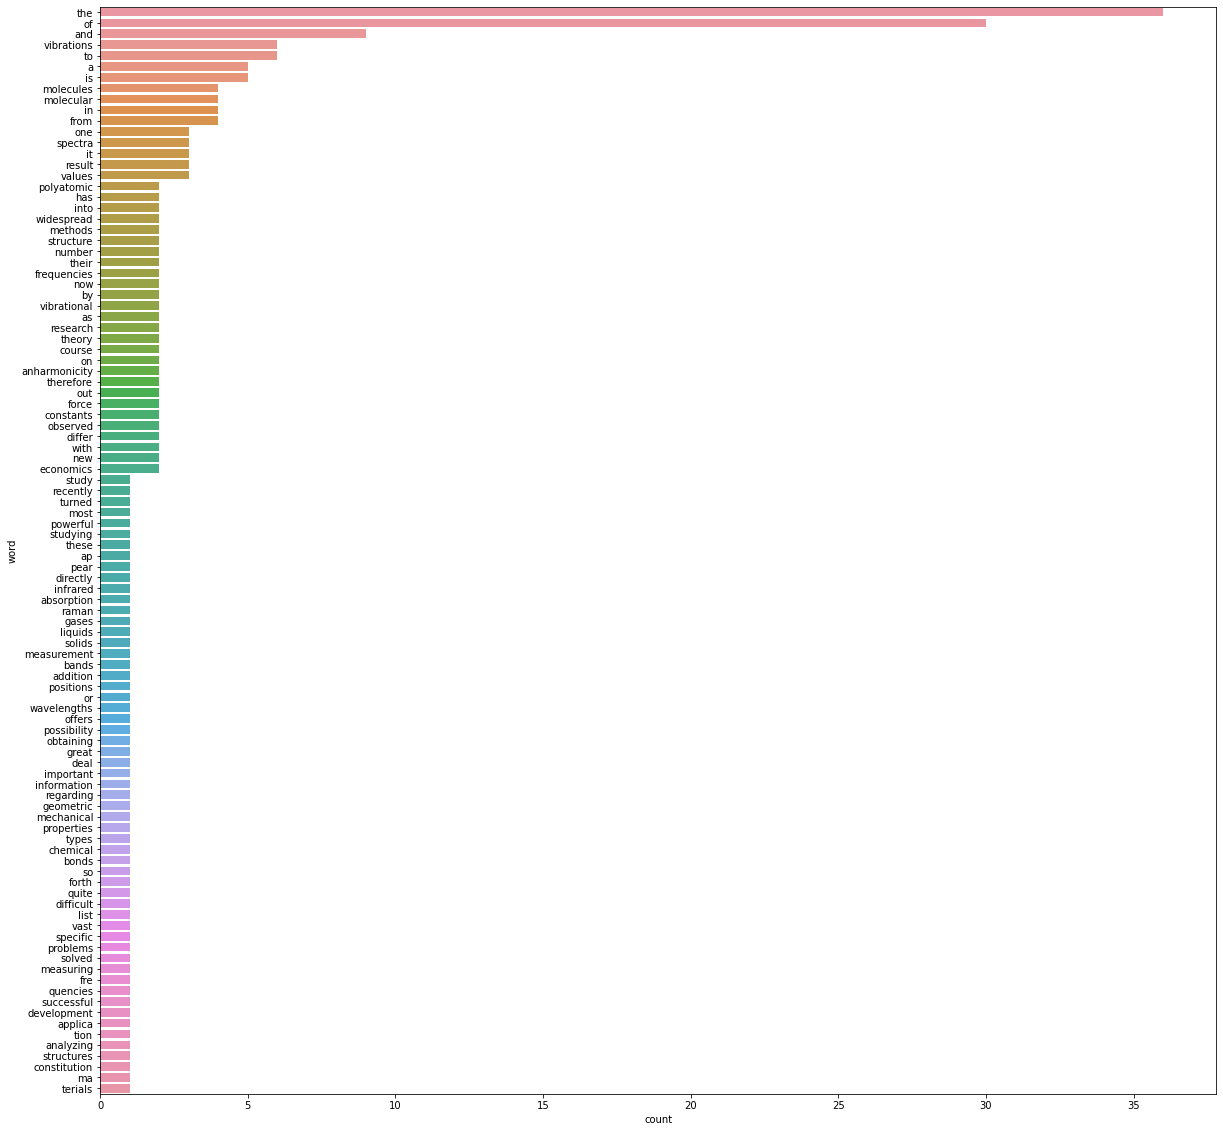

In [8]:
fre_words(df['clean_des'], 100)

In [9]:
X = df['clean_des']
y = df['fiction']

In [10]:
X.shape, y.shape

((45126,), (45126,))

In [11]:
print(f"Number of samples in dataset: {len(X)}")   ####Here imported train_test_spllit function from sklearn.model_selection function to train model. this model includes xtrain value as the features extracted from clean abstract and xval as genres of book to be classified. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

Number of samples in dataset: 45126
Number of samples in:
    Training: 31588
    Validation: 6769
    Testing: 6769


In [62]:
X_train_tf = tf.fit_transform(X_train)##This trained model uses Tfidfvectorizer to assign weight of features to genr
X_test_tf = tf.transform(X_test)  ### transform to X_test dataset
X_validation_tf = tf.transform(X_validation)

In [150]:
knn=KNeighborsClassifier(n_neighbors=29)  ### Create a knn classifier
knn.fit(X_train_tf, y_train)  ### fit on train data set
  ### make predictions on data set


KNeighborsClassifier(n_neighbors=29)

In [154]:
y_train_pred = knn.predict(X_train_tf)
y_validation_pred = knn.predict(X_validation_tf)
y_test_pred = knn.predict(X_test_tf)
print(knn)
print('train loss:',metrics.log_loss(y_train, y_train_pred))
print('test loss:',metrics.log_loss(y_test, y_test_pred))
print('validation loss: ', metrics.log_loss(y_validation, y_validation_pred))

KNeighborsClassifier(n_neighbors=29)
train loss: 4.286202076493908
test loss: 4.474906962430507
validation loss:  4.5514451871469594


In [143]:
#Create a svm Classifier
svc = LinearSVC(random_state=0)
svc.fit(X_train_tf, y_train)

#Predict the response for dataset

LinearSVC(random_state=0)

In [146]:
y_train_pred = svc.predict(X_train_tf)
y_validation_pred = svc.predict(X_validation_tf)
y_test_pred = svc.predict(X_test_tf)
print(svc)
print('train loss:',metrics.log_loss(y_train, y_train_pred))
print('test loss:',metrics.log_loss(y_test, y_test_pred))
print('validation loss: ', metrics.log_loss(y_validation, y_validation_pred))

LinearSVC(random_state=0)
train loss: 0.2230587548923084
test loss: 1.9746882530834124
validation loss:  2.14307383585193


In [65]:
logreg = LogisticRegression() ### Create a logistic regression
logreg.fit(X_train_tf, y_train)
y_pred_log = logreg.predict(X_test_tf)

In [78]:
y_train_pred = logreg.predict(X_train_tf)
y_validation_pred = logreg.predict(X_validation_tf)
y_test_pred = logreg.predict(X_test_tf)

In [141]:
print(logreg)
print('train loss:',metrics.log_loss(y_train, y_train_pred))
print('test loss:',metrics.log_loss(y_test, y_test_pred))
print('validation loss: ', metrics.log_loss(y_validation, y_validation_pred))

train loss: 1.4094308744158635
test loss: 2.11245993985657
validation loss:  2.2094104998556716


Best Threshold=0.552339, F-Score=0.939


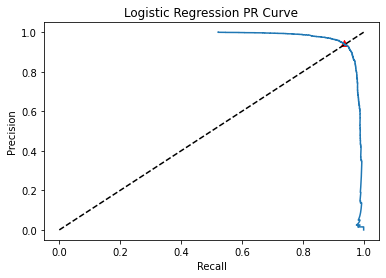

In [187]:
from sklearn.metrics import  precision_recall_curve
y_pred_prob = logreg.predict_proba(X_test_tf)[:,1]
precision, recall, thresholds =  precision_recall_curve(y_test, y_pred_prob)####Running the example first calculates the Fm for each threshold, then locates the score and threshold with the largest value.
    
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
best_thresh = thresholds[ix]

plt.plot([0, 1], [0, 1],'k--')
plt.plot(precision, recall, label='Logistic Regression')
plt.scatter(recall[ix], precision[ix], marker='^', color='red', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression PR Curve')
plt.show()


In [189]:
predictions = np.where(y_pred_prob > best_thresh,True,False)

In [192]:
print_metrics(logreg, y_test, predictions)

LogisticRegression()
confusion_matrix: 
 [[3250  182]
 [ 221 3116]]
binary cross entropy:  2.0563262540820366
accuracy:  0.9404638794504359
classification_report: 
               precision    recall  f1-score   support

       False       0.94      0.95      0.94      3432
        True       0.94      0.93      0.94      3337

    accuracy                           0.94      6769
   macro avg       0.94      0.94      0.94      6769
weighted avg       0.94      0.94      0.94      6769



In [18]:
def infer_tags(q, model):  ###  This function showing the output of the prediction 
    q = q.apply(lambda x: clean_text(x))
    q = [word for words in q[:2].str.split() for word in words if word not in ENGLISH_STOP_WORDS]    ## remove stopwords like "the","that","a" words
    q = [" ".join(q)]
    q_vec = tf.transform(q)
    q_pred = model.predict(q_vec)
    return q_pred

In [19]:
for i in range(5):  ###  show 5 predcition examples from knn classifier, compare with actual lables
    sam = X_test.sample(1)
    k = sam.index
    
    print('Title:', df['title'][k], 'predcition: ', infer_tags(sam, knn),  'Actual: ', df['fiction'][k])

Title: 13187    Ghetto Girls 6
Name: title, dtype: object predcition:  [ True] Actual:  13187    True
Name: fiction, dtype: bool
Title: 11780    The Works of John Ruskin 2 Part Set: Volume 28...
Name: title, dtype: object predcition:  [ True] Actual:  11780    True
Name: fiction, dtype: bool
Title: 12828    No Place to Die
Name: title, dtype: object predcition:  [ True] Actual:  12828    True
Name: fiction, dtype: bool
Title: 24769    Dr Bloodmoney
Name: title, dtype: object predcition:  [ True] Actual:  24769    True
Name: fiction, dtype: bool
Title: 41125    The CREDE Synthesis Project
Name: title, dtype: object predcition:  [False] Actual:  41125    False
Name: fiction, dtype: bool


In [32]:
for i in range(5):  ###  show 5 predcition examples from SVM classifier, compare with actual lables
    sam = X_test.sample(1)
    k = sam.index
    
    print('Title:', df['title'][k], 'predcition: ', infer_tags(sam, svc), 'Actual: ', df['fiction'][k])

Title: 16162    Notes from the Underground (1863)
Name: title, dtype: object predcition:  [ True] Actual:  16162    True
Name: fiction, dtype: bool
Title: 21925    From a Cornish Window
Name: title, dtype: object predcition:  [ True] Actual:  21925    True
Name: fiction, dtype: bool
Title: 38499    I Wrote Stone: The Selected Poetry of Ryszard ...
Name: title, dtype: object predcition:  [ True] Actual:  38499    True
Name: fiction, dtype: bool
Title: 41196    Remember Us
Name: title, dtype: object predcition:  [ True] Actual:  41196    True
Name: fiction, dtype: bool
Title: 11553    RC 605 Grave Secrets
Name: title, dtype: object predcition:  [ True] Actual:  11553    True
Name: fiction, dtype: bool


In [23]:
for i in range(5): ###  show 5 predcition examples from Losist Regression classifier, compare with actual lables
    sam = X_test.sample(1)
    k = sam.index
    
    print('Title:', df['title'][k], 'predcition: ', infer_tags(sam, logreg), 'Actual: ', df['fiction'][k])

Title: 21744    Shakespeare and the Eighteenth Century
Name: title, dtype: object predcition:  [ True] Actual:  21744    True
Name: fiction, dtype: bool
Title: 31576    Optimizing Emergency Department Throughput
Name: title, dtype: object predcition:  [False] Actual:  31576    False
Name: fiction, dtype: bool
Title: 37663    Love and Other Dangerous Chemicals
Name: title, dtype: object predcition:  [ True] Actual:  37663    True
Name: fiction, dtype: bool
Title: 28856    The Harlem Renaissance
Name: title, dtype: object predcition:  [ True] Actual:  28856    True
Name: fiction, dtype: bool
Title: 15546    Love and Strange Horses
Name: title, dtype: object predcition:  [ True] Actual:  15546    True
Name: fiction, dtype: bool


In [175]:
def print_metrics(model, y_test, y_pred):
    print(model)  ### This function preform model evaluation
    print('confusion_matrix: \n', confusion_matrix(y_test, y_pred))
    print('binary cross entropy: ', metrics.log_loss(y_test, y_pred))
    print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('classification_report: \n', classification_report(y_test, y_pred))

In [23]:
#hyperparameter tuning for knn
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy') ### using GridSearchCV method
grid.fit(X_validation_tf, y_validation)


print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8949632034821218
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=29, weights='distance')


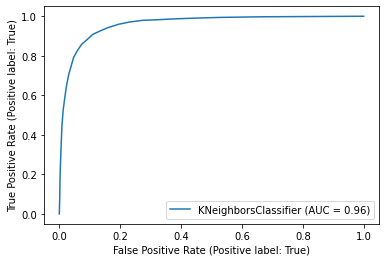

In [36]:
metrics.plot_roc_curve(knn, X_test_tf, y_test) 

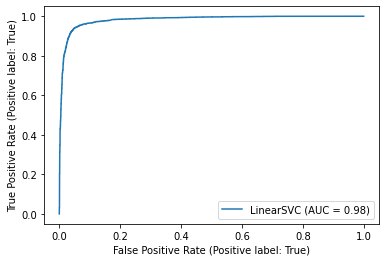

In [37]:
metrics.plot_roc_curve(svc, X_test_tf, y_test) 

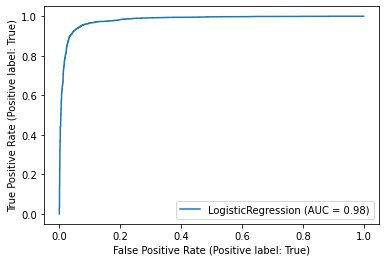

In [35]:
metrics.plot_roc_curve(logreg, X_test_tf, y_test) 

-0.14757919479561743
